# JEFF (Japanese Female Facial Expression)

## Importar

In [1]:
# %load basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
liga = '/home/ef/Documents/Diplomado/data/'

In [2]:
import time
start = time.time()

import os
os.listdir(liga + 'EF/JEFF/')

##UNZIP

import shutil

shutil.unpack_archive(liga + 'Mod_III/JEFF/images-20210122T175017Z-001.zip',
                      'images',
                      'zip')

In [3]:
df = pd.read_csv(liga + 'EF/JEFF/data_jeff.csv')
df.sample(4)

,filepath,student,facial_expression
32,images/KL.FE3.176.tiff,KL,fear
110,images/NA.AN3.213.tiff,NaN,angry
27,images/KL.DI2.171.tiff,KL,disgust
121,images/NA.NE2.200.tiff,NaN,neutral


In [4]:
##Distribución por estudiante y expresión facial
df.pivot_table(index = 'facial_expression', 
               columns = 'student',
               values = 'filepath',
               aggfunc = 'count')

student,KA,KL,KM,KR,MK,NM,TM,UY,YM
facial_expression,,,,,,,,,
angry,3,3,3,3,3,3,3,3,3
disgust,3,4,2,3,3,2,3,3,3
fear,4,3,3,3,3,3,3,3,4
happiness,4,3,4,2,3,3,3,3,3
neutral,3,3,3,3,3,3,3,3,3
sadness,3,3,4,3,3,3,3,3,3
surprise,3,3,3,3,3,3,3,3,3


## Imágenes

In [5]:
import os
image_dir = os.getcwd() + '/images/JEFF/images/'
images = os.listdir(image_dir)

display(image_dir)
print(f'En total hay {len(images)} imágenes, las primeras 7: ')
images[:7]

'/home/ef/Desktop/diplomadus/diplomadus/_practicas/images/JEFF/images/'

En total hay 213 imágenes, las primeras 7: 


['NM.SA3.100.tiff',
 'TM.DI1.193.tiff',
 'TM.NE2.178.tiff',
 'NA.DI2.215.tiff',
 'NA.FE3.219.tiff',
 'MK.FE2.132.tiff',
 'NA.SU3.210.tiff']

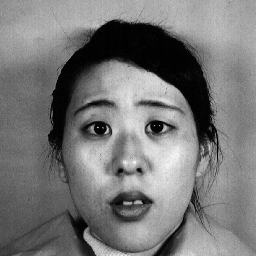

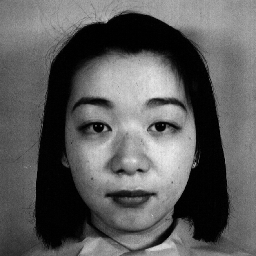

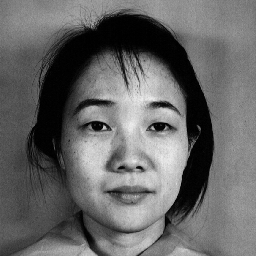

In [6]:
##Sample de imágenes
import random
from PIL import Image

for _ in range(3):
    test = image_dir + images[random.randint(0,len(images)-1)]
    test = Image.open(test)
    display(test)

In [7]:
from PIL import Image

def img_to_df(image_dir, images, n = 256):
    df = []
    names = []
    for image in images:
        adjust = Image.open(image_dir + image).convert('RGB')
        df.append(np.array(adjust.resize((n,n))).ravel())
        names.append('images/'+image)
    return pd.DataFrame(df, index = names)

In [8]:
df = df.set_index('filepath').iloc[:,-1:].join(img_to_df(image_dir,images))
df.sample(4)

,facial_expression,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,...,196508,196509,196510,196511,196512,196513,196514,196515,196516,196517,196518,196519,196520,196521,196522,196523,196524,196525,196526,196527,196528,196529,196530,196531,196532,196533,196534,196535,196536,196537,196538,196539,196540,196541,196542,196543,196544,196545,196546,196547,196548,196549,196550,196551,196552,196553,196554,196555,196556,196557,196558,196559,196560,196561,196562,196563,196564,196565,196566,196567,196568,196569,196570,196571,196572,196573,196574,196575,196576,196577,196578,196579,196580,196581,196582,196583,196584,196585,196586,196587,196588,196589,196590,196591,196592,196593,196594,196595,196596,196597,196598,196599,196600,196601,196602,196603,196604,196605,196606,196607
filepath,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
images/KA.AN2.40.tiff,angry,114,114,114,115,115,115,116,116,116,118,118,118,118,118,118,114,114,114,113,113,113,118,118,118,116,116,116,114,114,114,118,118,118,118,118,118,115,115,115,121,121,121,122,122,122,120,120,120,127,127,127,124,124,124,126,126,126,121,121,121,133,133,133,130,130,130,132,132,132,133,133,133,132,132,132,133,133,133,138,138,138,136,136,136,137,137,137,138,138,138,134,134,134,139,139,139,135,135,135,...,155,154,154,154,151,151,151,141,141,141,139,139,139,132,132,132,146,146,146,137,137,137,129,129,129,121,121,121,131,131,131,125,125,125,113,113,113,108,108,108,110,110,110,102,102,102,104,104,104,91,91,91,96,96,96,92,92,92,83,83,83,75,75,75,95,95,95,105,105,105,102,102,102,94,94,94,99,99,99,97,97,97,100,100,100,101,101,101,106,106,106,115,115,115,105,105,105,105,105,105
images/YM.FE1.67.tiff,fear,154,154,154,159,159,159,164,164,164,169,169,169,166,166,166,167,167,167,171,171,171,163,163,163,175,175,175,161,161,161,169,169,169,167,167,167,178,178,178,172,172,172,175,175,175,172,172,172,176,176,176,176,176,176,170,170,170,174,174,174,171,171,171,171,171,171,172,172,172,171,171,171,184,184,184,172,172,172,187,187,187,173,173,173,174,174,174,178,178,178,189,189,189,175,175,175,177,177,177,...,201,194,194,194,206,206,206,206,206,206,203,203,203,206,206,206,198,198,198,201,201,201,198,198,198,203,203,203,201,201,201,197,197,197,194,194,194,196,196,196,187,187,187,185,185,185,174,174,174,191,191,191,187,187,187,188,188,188,180,180,180,177,177,177,181,181,181,175,175,175,175,175,175,169,169,169,169,169,169,160,160,160,165,165,165,159,159,159,160,160,160,164,164,164,157,157,157,157,157,157
images/KM.SU1.14.tiff,surprise,159,159,159,155,155,155,165,165,165,159,159,159,155,155,155,164,164,164,159,159,159,158,158,158,159,159,159,161,161,161,166,166,166,162,162,162,159,159,159,161,161,161,161,161,161,160,160,160,164,164,164,158,158,158,166,166,166,163,163,163,170,170,170,174,174,174,165,165,165,165,165,165,164,164,164,168,168,168,172,172,172,171,171,171,177,177,177,171,171,171,169,169,169,174,174,174,177,177,177,...,129,131,131,131,133,133,133,138,138,138,135,135,135,128,128,128,129,129,129,131,131,131,131,131,131,134,134,134,141,141,141,132,132,132,133,133,133,136,136,136,139,139,139,126,126,126,133,133,133,131,131,131,134,134,134,145,145,145,149,149,149,140,140,140,133,133,133,140,140,140,142,142,142,140,140,140,138,138,138,133,133,133,140,140,140,148,148,148,129,129,129,135,135,135,139,139,139,140,140,140
images/YM.SA1.55.tiff,sadness,170,170,170,156,156,156,165,165,165,167,167,167,172,172,172,171,171,171,170,170,170,175,175,175,165,165,165,186,186,186,166,166,166,173,173,173,170,170,170,161,161,161,169,169,169,169,169,169,174,174,174,165,165,165,176,176,176,173,173,173,168,168,168,170,170,170,174,174,174,173,173,173,174

## Modelado

### Preprocesamiento

In [9]:
X = df.iloc[:,1:]
y = df['facial_expression']

y.value_counts(1)

fear        0.15
happiness   0.15
sadness     0.15
surprise    0.14
neutral     0.14
angry       0.14
disgust     0.14
Name: facial_expression, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.7, 
                                                    random_state = 22)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(.999)

### XGB

In [12]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

param_xgb = {'learning_rate':[x/100 for x in range(1,111)],
             'n_estimators':[x for x in range(1,111)],
             'max_depth':[x for x in range(1,11)], 
             'min_child_weight':[x/10 for x in range(1,111)],
             'objective':['count:poisson','multi:softmax'],
             'subsample':[x/100 for x in range(1,111)], 
             'colsample_bytree':[x/100 for x in range(1,111)], 
            }

from sklearn.model_selection import RandomizedSearchCV
search_xgb = RandomizedSearchCV(param_distributions = param_xgb, 
                                cv = 5, 
                                n_jobs = -1, 
                                scoring = 'accuracy', 
                                estimator = xgb, 
                                verbose = 5,
                                n_iter = 300,
                                random_state = 22)

In [13]:
from sklearn.pipeline import Pipeline
modelo = Pipeline(steps=[('PCA', pca),
                         ('XGBoost', search_xgb)])

modelo.fit(X_train,y_train).score(X_test,y_test)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.3min finished


0.828125

## Validación

'Accuracy de 82.81%'

<AxesSubplot:>

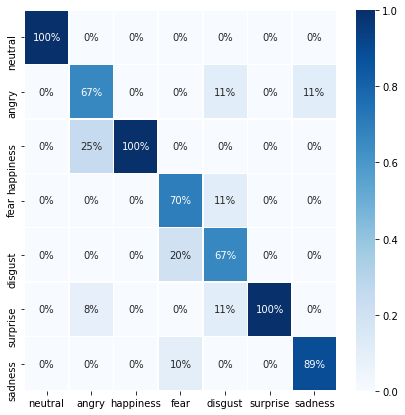

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = pd.DataFrame(confusion_matrix(y_true = y_test,
                                   y_pred = modelo.predict(X_test)),
                  index = [y_test[index] for index in 
                           sorted(np.unique(y_test, return_index=True)[1])], 
                  columns = [y_test[index] for index in 
                             sorted(np.unique(y_test, return_index=True)[1])])

##Tiene buena acertividad (suma de diagonal en la matriz de confusión)
display('Accuracy de {:.2%}'.format(np.asarray(cm).trace()/len(y_test)))

fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(pd.DataFrame([cm[col]/cm[col].sum() for col in cm.columns]).transpose(), 
            annot = True,
            fmt = '.0%',
            cmap = 'Blues',
            linewidths = 0.5, 
            ax = ax)

##Exportar modelo
import pickle
with open('modelo_jeff_v2.pkl', "wb") as f:
    pickle.dump(modelo, f)

##Importar modelo
import pickle    
with open('modelo_jeff_v2.pkl', "rb") as f:
    modelo = pickle.load(f)

In [15]:
from PIL import Image

def expression(image_dir,image_name, n = 256):
        image = Image.open(image_dir + image_name).resize((n,n)).convert('RGB')
        pred = np.array(image).ravel()
        display(image)
        print(f'This feeling is: {modelo.predict([pred])[0]}')

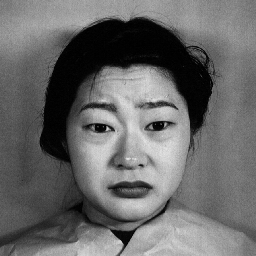

This feeling is: fear


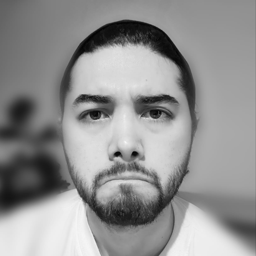

This feeling is: angry


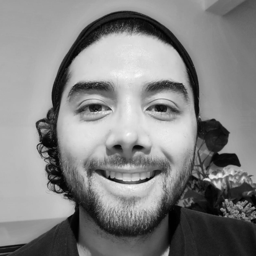

This feeling is: happiness


In [16]:
for val in os.listdir(os.getcwd() + '/images/JEFF/val/'):
    expression(os.getcwd() + '/images/JEFF/val/', val)

## Fin

In [ ]:
import math
def time_exp(x):
    print(str(int(math.floor(x/60))
             ) + " minutos con " + '{:.2f}'.format(60*(x/60 - math.floor(x/60))
                                                  ) + " segundos")

In [17]:
end = time.time()
time_exp(end - start)

2 minutos con 26.47 segundos


In [18]:
## Tono para cuando termina código
from IPython.lib.display import Audio
import numpy as np

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(5*np.pi*300*t) + np.sin(2*np.pi*240*t)

## La siguiente línea debe ir debajo del código p que suene
Audio(audio_data, rate=framerate, autoplay=True)

## PCA 2D

In [ ]:
pca2 = PCA(2)

Xp2 = pd.DataFrame(pca2.fit_transform(X),
                   index = y, 
                   columns = ['p1','p2'])
Xp2.reset_index(inplace = True)

label = y.name
Xp2[label] = Xp2[label].astype(str)

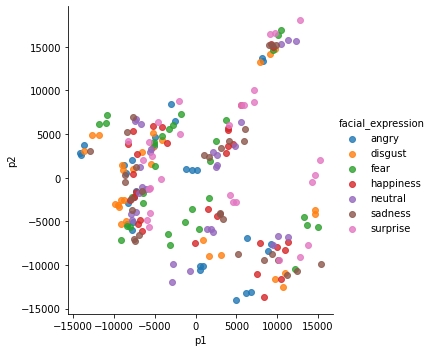

In [25]:
sns.lmplot(data = Xp2,
           x = 'p1',
           y = 'p2',
           fit_reg = False, 
           hue = label)